In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [2]:
# Dataset paths
first_set_path = r'Dataset/First Set'
second_set_path = r'Dataset/Second Set'

# Image categories
categories = ['Normal', 'OSCC']

In [3]:
def load_images_from_folder(folder_path, img_size=(224, 224)):
    images = []
    labels = []
    for category in categories:
        path = os.path.join(folder_path, category)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            if category == 'Normal':
                labels.append(0) 
            else:
                labels.append(1)
    return np.array(images), np.array(labels)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,     
    width_shift_range=0.1,  
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.1,
    horizontal_flip=True
)


In [5]:
# Load 100x images
x_100x, y_100x = load_images_from_folder(first_set_path)

# Load 400x images
x_400x, y_400x = load_images_from_folder(second_set_path)

# Combine the datasets
x_data = np.concatenate((x_100x, x_400x), axis=0)
y_data = np.concatenate((y_100x, y_400x), axis=0)


# Shuffle the dataset
from sklearn.utils import shuffle
x_data, y_data = shuffle(x_data, y_data, random_state=42)

In [6]:
unique, counts = np.unique(y_data, return_counts=True)
print(dict(zip(unique, counts)))

{0: 290, 1: 934}


In [7]:
# # ==================================ImageDataGenerator on Just Normal========================================== #


# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen_normal = ImageDataGenerator(
#     rotation_range=10,     
#     width_shift_range=0.1,  
#     height_shift_range=0.1,
#     shear_range=0.15,
#     zoom_range=0.1,
#     horizontal_flip=True
# )

# # Oversample the Normal class
# x_normal = x_data[y_data == 0]
# y_normal = y_data[y_data == 0]
# x_oscc = x_data[y_data == 1]
# y_oscc = y_data[y_data == 1]



# # Apply this only to the Normal class
# x_normal_augmented, y_normal_augmented = datagen_normal.flow(
#     x_normal, y_normal, batch_size=len(x_normal), shuffle=False
# ).next()

# # Combine augmented data with original data
# x_data_balanced = np.concatenate([x_oscc, x_normal_augmented], axis=0)
# y_data_balanced = np.concatenate([y_oscc, y_normal_augmented], axis=0)



# x_data = x_data_balanced
# y_data = y_data_balanced

In [8]:
# # ==================================RE-Sample========================================== #


# from sklearn.utils import resample

# # Oversample the Normal class
# x_normal = x_data[y_data == 0]
# y_normal = y_data[y_data == 0]
# x_oscc = x_data[y_data == 1]
# y_oscc = y_data[y_data == 1]

# x_normal_oversampled, y_normal_oversampled = resample(
#     x_normal, y_normal, 
#     replace=True, 
#     n_samples=len(y_oscc), 
#     random_state=42
# )

# x_data_balanced = np.concatenate([x_normal_oversampled, x_oscc], axis=0)
# y_data_balanced = np.concatenate([y_normal_oversampled, y_oscc], axis=0)


# x_data = x_data_balanced
# y_data = y_data_balanced

In [9]:
print(len(x_data), len(y_data))

1224 1224


In [10]:
unique, counts = np.unique(y_data, return_counts=True)
print(dict(zip(unique, counts)))

{0: 290, 1: 934}


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [12]:
# Augment the training set
train_datagen = datagen.flow(x_train, y_train, batch_size=32)

In [13]:
len(train_datagen)  

31

In [14]:
from tensorflow.keras.layers import BatchNormalization


model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),


    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Compile the model
#model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
# Model summary
model.summary()

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,497 (42.61 MB)

 Trainable params: 11,169,793 (42.61 MB)

 Non-trainable params: 704 (2.75 KB)

In [15]:
len(y_data)

1224

In [16]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_data),
    y=y_data
)

class_weights = {i: weight for i, weight in enumerate(class_weights)}

In [17]:
class_weights = {0: 3.5, 1: 1.0}
class_weights

{0: 3.5, 1: 1.0}

In [18]:
history = model.fit(train_datagen, validation_data=(x_test, y_test), epochs=20, class_weight=class_weights)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32, tf.int32, tf.float32), but the yielded element was (array([[[[0.27397642, 0.22876753, 0.44412982],
         [0.25153735, 0.20066527, 0.43218425],
         [0.18473662, 0.14529997, 0.4347991 ],
         ...,
         [0.8318254 , 0.90141743, 0.85481143],
         [0.8311672 , 0.9016322 , 0.85477877],
         [0.830509  , 0.9005791 , 0.8543838 ]],

        [[0.19491237, 0.14118414, 0.41835216],
         [0.26586956, 0.23290461, 0.48902094],
         [0.24973564, 0.23283844, 0.49904022],
         ...,
         [0.8141042 , 0.8743314 , 0.84454095],
         [0.813446  , 0.8732783 , 0.844146  ],
         [0.81278783, 0.8722252 , 0.84375113]],

        [[0.26530662, 0.24694632, 0.52448   ],
         [0.395384  , 0.3983398 , 0.6142999 ],
         [0.38683364, 0.3706824 , 0.59669554],
         ...,
         [0.8302228 , 0.8828936 , 0.84928995],
         [0.8310126 , 0.88342017, 0.8495532 ],
         [0.83180237, 0.8839467 , 0.8498165 ]],

        ...,

        [[0.14836502, 0.1395173 , 0.4057002 ],
         [0.51753   , 0.5012583 , 0.63230926],
         [0.5139936 , 0.48004007, 0.6606002 ],
         ...,
         [0.54509807, 0.48235294, 0.6666667 ],
         [0.54509807, 0.48235294, 0.6666667 ],
         [0.54509807, 0.48235294, 0.6666667 ]],

        [[0.13366462, 0.12508912, 0.39671662],
         [0.51559216, 0.49994394, 0.63011676],
         [0.51412976, 0.48085675, 0.65951127],
         ...,
         [0.54509807, 0.48235294, 0.6666667 ],
         [0.54509807, 0.48235294, 0.6666667 ],
         [0.54509807, 0.48235294, 0.6666667 ]],

        [[0.1189642 , 0.11066095, 0.38773304],
         [0.50089175, 0.48551577, 0.6211332 ],
         [0.51426584, 0.48167345, 0.65842235],
         ...,
         [0.54509807, 0.48235294, 0.6666667 ],
         [0.54509807, 0.48235294, 0.6666667 ],
         [0.54509807, 0.48235294, 0.6666667 ]]],


       [[[1.        , 0.8117647 , 0.9607843 ],
         [1.        , 0.8117647 , 0.9607843 ],
         [1.        , 0.8117647 , 0.9607843 ],
         ...,
         [0.95292616, 0.80903625, 0.9851479 ],
         [0.8904098 , 0.70777696, 0.9213076 ],
         [0.95012563, 0.82428145, 0.9345491 ]],

        [[1.        , 0.8117647 , 0.9607843 ],
         [1.        , 0.8117647 , 0.9607843 ],
         [1.        , 0.8117647 , 0.9607843 ],
         ...,
         [0.9586331 , 0.82357717, 0.962188  ],
         [0.94316   , 0.7738937 , 0.9463898 ],
         [0.5763415 , 0.4799866 , 0.7338718 ]],

        [[1.        , 0.8117647 , 0.9607843 ],
         [1.        , 0.8117647 , 0.9607843 ],
         [1.        , 0.8117647 , 0.9607843 ],
         ...,
         [0.9559968 , 0.82138366, 0.9389762 ],
         [0.9664769 , 0.8078432 , 0.9502428 ],
         [0.3277174 , 0.27732354, 0.6523663 ]],

        ...,

        [[0.8112939 , 0.7294118 , 0.93035334],
         [0.81242573, 0.7294118 , 0.9280898 ],
         [0.8135575 , 0.7294118 , 0.9258262 ],
         ...,
         [0.60269475, 0.39477986, 0.7595133 ],
         [0.6543054 , 0.44075006, 0.7675592 ],
         [0.64410746, 0.41939604, 0.74912655]],

        [[0.82898146, 0.7214347 , 0.9162506 ],
         [0.8346404 , 0.71803933, 0.913987  ],
         [0.8402993 , 0.71464396, 0.91172343],
         ...,
         [0.49716246, 0.3249434 , 0.70974064],
         [0.602614  , 0.41758472, 0.74512976],
         [0.7055956 , 0.48348162, 0.7742903 ]],

        [[0.8689066 , 0.72268796, 0.9142852 ],
         [0.87739503, 0.7328741 , 0.9193782 ],
         [0.88588345, 0.7430602 , 0.92447126],
         ...,
         [0.37673327, 0.21454065, 0.6477831 ],
         [0.5057905 , 0.34204218, 0.7087784 ],
         [0.71684575, 0.5208417 , 0.8003557 ]]],


       [[[0.5471829 , 0.54245406, 0.75468904],
         [0.5427098 , 0.5253075 , 0.7353561 ],
         [0.53867227, 0.48984972, 0.7254902 ],
         ...,
         [0.7248351 , 0.81206346, 0.9149781 ],
         [0.7143713 , 0.8063956 , 0.91410613],
         [0.7083298 , 0.80146474, 0.91249704]],

        [[0.5391056 , 0.53990334, 0.7551142 ],
         [0.54908663, 0.5299838 , 0.7383319 ],
         [0.53612155, 0.49282557, 0.7254902 ],
         ...,
         [0.68856347, 0.76852083, 0.8960251 ],
         [0.6861655 , 0.7642154 , 0.89368165],
         [0.68529356, 0.76029146, 0.8901937 ]],

        [[0.53102833, 0.5373526 , 0.7555393 ],
         [0.55546343, 0.53466016, 0.7413078 ],
         [0.5335708 , 0.49580142, 0.7254902 ],
         ...,
         [0.67870474, 0.73064196, 0.8638386 ],
         [0.6817238 , 0.7356972 , 0.8684319 ],
         [0.6865197 , 0.7448531 , 0.8767158 ]],

        ...,

        [[0.8209031 , 0.9647059 , 0.9388092 ],
         [0.82308304, 0.9647059 , 0.94142514],
         [0.825263  , 0.9647059 , 0.9440411 ],
         ...,
         [0.44705883, 0.4627451 , 0.7529412 ],
         [0.44705883, 0.4627451 , 0.7529412 ],
         [0.44705883, 0.4627451 , 0.7529412 ]],

        [[0.83669645, 0.96420205, 0.9587689 ],
         [0.83451647, 0.96376604, 0.95702493],
         [0.8323365 , 0.96333003, 0.95528096],
         ...,
         [0.44705883, 0.4627451 , 0.7529412 ],
         [0.44705883, 0.4627451 , 0.7529412 ],
         [0.44705883, 0.4627451 , 0.7529412 ]],

        [[0.8188592 , 0.963779  , 0.9480927 ],
         [0.8184232 , 0.96552294, 0.9498367 ],
         [0.8179872 , 0.9672669 , 0.95158064],
         ...,
         [0.44705883, 0.4627451 , 0.7529412 ],
         [0.44705883, 0.4627451 , 0.7529412 ],
         [0.44705883, 0.4627451 , 0.7529412 ]]],


       ...,


       [[[0.2903969 , 0.18056786, 0.2784314 ],
         [0.31858125, 0.20522918, 0.2784314 ],
         [0.29637167, 0.19839427, 0.281581  ],
         ...,
         [0.42352942, 0.38845983, 0.41968268],
         [0.42352942, 0.39269495, 0.4210944 ],
         [0.42352942, 0.39693007, 0.4225061 ]],

        [[0.2991149 , 0.19136916, 0.28151867],
         [0.31563622, 0.20265226, 0.2784314 ],
         [0.2993167 , 0.19949867, 0.28121287],
         ...,
         [0.42436048, 0.4127256 , 0.4189066 ],
         [0.4247134 , 0.40813756, 0.41361272],
         [0.42506632, 0.40354952, 0.40831885]],

        [[0.30868632, 0.20314938, 0.28483185],
         [0.31269115, 0.20007534, 0.2784314 ],
         [0.30226177, 0.20060307, 0.28084475],
         ...,
         [0.41485357, 0.35332137, 0.36790788],
         [0.40814796, 0.34308654, 0.3654374 ],
         [0.40144238, 0.33285168, 0.3629669 ]],

        ...,

        [[0.12767941, 0.02240206, 0.19012201],
         [0.12487406, 0.02704689, 0.2006266 ],
         [0.12740551, 0.06890457, 0.26607764],
         ...,
         [0.25402182, 0.18501906, 0.3237488 ],
         [0.32778257, 0.24906135, 0.34970084],
         [0.34300706, 0.2878697 , 0.36936957]],

        [[0.13935369, 0.04517943, 0.2087922 ],
         [0.12177818, 0.02169983, 0.17829034],
         [0.12199783, 0.05037465, 0.24413076],
         ...,
         [0.25162423, 0.19891529, 0.32121614],
         [0.3398398 , 0.2759596 , 0.36648175],
         [0.35211724, 0.28963897, 0.38117546]],

        [[0.20802225, 0.09611996, 0.24275726],
         [0.16552794, 0.05976436, 0.21928605],
         [0.13778144, 0.06596161, 0.23716757],
         ...,
         [0.25452146, 0.19948718, 0.31226805],
         [0.32265872, 0.26883772, 0.34944275],
         [0.3383035 , 0.2757387 , 0.35925916]]],


       [[[0.99215686, 0.9950188 , 1.        ],
         [0.98641324, 0.99215686, 1.        ],
         [0.9787381 , 0.99215686, 1.        ],
         ...,
         [0.43529412, 0.24086258, 0.6785496 ],
         [0.43529412, 0.24141759, 0.6766071 ],
         [0.43529412, 0.2419726 , 0.67466456]],

        [[0.99215686, 0.99527645, 1.        ],
         [0.98770154, 0.99215686, 1.        ],
         [0.97744983, 0.99215686, 1.        ],
         ...,
         [0.39099494, 0.23821512, 0.660744  ],
         [0.38599986, 0.23766011, 0.659634  ],
         [0.38100475, 0.2371051 , 0.658524  ]],

        [[0.99215686, 0.9955341 , 1.        ],
         [0.98898983, 0.99215686, 1.        ],
         [0.97616154, 0.99215686, 1.        ],
         ...,
         [0.3668438 , 0.23315622, 0.6805568 ],
         [0.3671213 , 0.23287871, 0.6838868 ],
         [0.3673988 , 0.23260121, 0.6872169 ]],

        ...,

        [[0.52603227, 0.34007913, 0.7914304 ],
         [0.5411685 , 0.3486139 , 0.7774969 ],
         [0.5170525 , 0.32799736, 0.7631921 ],
         ...,
         [0.38413888, 0.2156068 , 0.7254425 ],
         [0.39024398, 0.21838184, 0.7271075 ],
         [0.39634907, 0.2211569 , 0.7287726 ]],

        [[0.5680852 , 0.37707558, 0.80685425],
         [0.5281226 , 0.34031376, 0.7829931 ],
         [0.5408417 , 0.3324759 , 0.76201826],
         ...,
         [0.41115427, 0.24181281, 0.73073626],
         [0.40837923, 0.24292283, 0.72962624],
         [0.40560418, 0.24403284, 0.7285162 ]],

        [[0.55757296, 0.36211127, 0.801839  ],
         [0.5525316 , 0.36817366, 0.79355574],
         [0.53743845, 0.34713185, 0.7838914 ],
         ...,
         [0.3882353 , 0.24444787, 0.7307142 ],
         [0.3882353 , 0.24306035, 0.7326567 ],
         [0.3882353 , 0.24167283, 0.73459923]]],


       [[[0.8447261 , 0.927079  , 1.        ],
         [0.8364984 , 0.9188513 , 0.99879575],
         [0.8375258 , 0.92156863, 0.99185365],
         ...,
         [0.93333334, 0.99215686, 1.        ],
         [0.93333334, 0.99215686, 1.        ],
         [0.93333334, 0.99215686, 1.        ]],

        [[0.8460657 , 0.92841864, 1.        ],
         [0.8361635 , 0.91851646, 0.9991306 ],
         [0.83819556, 0.92156863, 0.9935281 ],
         ...,
         [0.93333334, 0.99215686, 1.        ],
         [0.93333334, 0.99215686, 1.        ],
         [0.93333334, 0.99215686, 1.        ]],

        [[0.84740525, 0.9297582 , 1.        ],
         [0.8358286 , 0.91818154, 0.9994655 ],
         [0.83886534, 0.92156863, 0.9952026 ],
         ...,
         [0.93085295, 0.9938105 , 1.        ],
         [0.9298484 , 0.9944802 , 1.        ],
         [0.92884374, 0.9951499 , 1.        ]],

        ...,

        [[0.5786684 , 0.56155026, 0.8160791 ],
         [0.5834823 , 0.57984   , 0.8350181 ],
         [0.5944451 , 0.60415554, 0.8619848 ],
         ...,
         [0.46623093, 0.44113687, 0.6686718 ],
         [0.5272717 , 0.49696228, 0.7355478 ],
         [0.515936  , 0.5308926 , 0.75249213]],

        [[0.7235891 , 0.7466091 , 0.9298872 ],
         [0.71271884, 0.74528444, 0.9339862 ],
         [0.70180994, 0.73708445, 0.9249455 ],
         ...,
         [0.53037447, 0.50493777, 0.75277436],
         [0.5908258 , 0.54869586, 0.7625665 ],
         [0.5233365 , 0.55133706, 0.78539103]],

        [[0.7137866 , 0.7416721 , 0.92430866],
         [0.6839193 , 0.7398768 , 0.91336644],
         [0.6490097 , 0.7092742 , 0.88252884],
         ...,
         [0.57199365, 0.5650687 , 0.7978477 ],
         [0.5585299 , 0.55345744, 0.7869551 ],
         [0.6535575 , 0.6141046 , 0.8709714 ]]]], dtype=float32), array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])).
Traceback (most recent call last):

  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 204, in generator_py_func
    flattened_values = nest.flatten_up_to(output_types, values)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\data\util\nest.py", line 237, in flatten_up_to
    return nest_util.flatten_up_to(
           ^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\util\nest_util.py", line 1541, in flatten_up_to
    return _tf_data_flatten_up_to(shallow_tree, input_tree)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\util\nest_util.py", line 1570, in _tf_data_flatten_up_to
    _tf_data_assert_shallow_structure(shallow_tree, input_tree)

  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\util\nest_util.py", line 1427, in _tf_data_assert_shallow_structure
    raise ValueError(

ValueError: The two structures don't have the same sequence length. Input structure has length 2, while shallow structure has length 3.


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\ops\script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 206, in generator_py_func
    raise TypeError(

TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32, tf.int32, tf.float32), but the yielded element was (array([[[[0.27397642, 0.22876753, 0.44412982],
         [0.25153735, 0.20066527, 0.43218425],
         [0.18473662, 0.14529997, 0.4347991 ],
         ...,
         [0.8318254 , 0.90141743, 0.85481143],
         [0.8311672 , 0.9016322 , 0.85477877],
         [0.830509  , 0.9005791 , 0.8543838 ]],

        [[0.19491237, 0.14118414, 0.41835216],
         [0.26586956, 0.23290461, 0.48902094],
         [0.24973564, 0.23283844, 0.49904022],
         ...,
         [0.8141042 , 0.8743314 , 0.84454095],
         [0.813446  , 0.8732783 , 0.844146  ],
         [0.81278783, 0.8722252 , 0.84375113]],

        [[0.26530662, 0.24694632, 0.52448   ],
         [0.395384  , 0.3983398 , 0.6142999 ],
         [0.38683364, 0.3706824 , 0.59669554],
         ...,
         [0.8302228 , 0.8828936 , 0.84928995],
         [0.8310126 , 0.88342017, 0.8495532 ],
         [0.83180237, 0.8839467 , 0.8498165 ]],

        ...,

        [[0.14836502, 0.1395173 , 0.4057002 ],
         [0.51753   , 0.5012583 , 0.63230926],
         [0.5139936 , 0.48004007, 0.6606002 ],
         ...,
         [0.54509807, 0.48235294, 0.6666667 ],
         [0.54509807, 0.48235294, 0.6666667 ],
         [0.54509807, 0.48235294, 0.6666667 ]],

        [[0.13366462, 0.12508912, 0.39671662],
         [0.51559216, 0.49994394, 0.63011676],
         [0.51412976, 0.48085675, 0.65951127],
         ...,
         [0.54509807, 0.48235294, 0.6666667 ],
         [0.54509807, 0.48235294, 0.6666667 ],
         [0.54509807, 0.48235294, 0.6666667 ]],

        [[0.1189642 , 0.11066095, 0.38773304],
         [0.50089175, 0.48551577, 0.6211332 ],
         [0.51426584, 0.48167345, 0.65842235],
         ...,
         [0.54509807, 0.48235294, 0.6666667 ],
         [0.54509807, 0.48235294, 0.6666667 ],
         [0.54509807, 0.48235294, 0.6666667 ]]],


       [[[1.        , 0.8117647 , 0.9607843 ],
         [1.        , 0.8117647 , 0.9607843 ],
         [1.        , 0.8117647 , 0.9607843 ],
         ...,
         [0.95292616, 0.80903625, 0.9851479 ],
         [0.8904098 , 0.70777696, 0.9213076 ],
         [0.95012563, 0.82428145, 0.9345491 ]],

        [[1.        , 0.8117647 , 0.9607843 ],
         [1.        , 0.8117647 , 0.9607843 ],
         [1.        , 0.8117647 , 0.9607843 ],
         ...,
         [0.9586331 , 0.82357717, 0.962188  ],
         [0.94316   , 0.7738937 , 0.9463898 ],
         [0.5763415 , 0.4799866 , 0.7338718 ]],

        [[1.        , 0.8117647 , 0.9607843 ],
         [1.        , 0.8117647 , 0.9607843 ],
         [1.        , 0.8117647 , 0.9607843 ],
         ...,
         [0.9559968 , 0.82138366, 0.9389762 ],
         [0.9664769 , 0.8078432 , 0.9502428 ],
         [0.3277174 , 0.27732354, 0.6523663 ]],

        ...,

        [[0.8112939 , 0.7294118 , 0.93035334],
         [0.81242573, 0.7294118 , 0.9280898 ],
         [0.8135575 , 0.7294118 , 0.9258262 ],
         ...,
         [0.60269475, 0.39477986, 0.7595133 ],
         [0.6543054 , 0.44075006, 0.7675592 ],
         [0.64410746, 0.41939604, 0.74912655]],

        [[0.82898146, 0.7214347 , 0.9162506 ],
         [0.8346404 , 0.71803933, 0.913987  ],
         [0.8402993 , 0.71464396, 0.91172343],
         ...,
         [0.49716246, 0.3249434 , 0.70974064],
         [0.602614  , 0.41758472, 0.74512976],
         [0.7055956 , 0.48348162, 0.7742903 ]],

        [[0.8689066 , 0.72268796, 0.9142852 ],
         [0.87739503, 0.7328741 , 0.9193782 ],
         [0.88588345, 0.7430602 , 0.92447126],
         ...,
         [0.37673327, 0.21454065, 0.6477831 ],
         [0.5057905 , 0.34204218, 0.7087784 ],
         [0.71684575, 0.5208417 , 0.8003557 ]]],


       [[[0.5471829 , 0.54245406, 0.75468904],
         [0.5427098 , 0.5253075 , 0.7353561 ],
         [0.53867227, 0.48984972, 0.7254902 ],
         ...,
         [0.7248351 , 0.81206346, 0.9149781 ],
         [0.7143713 , 0.8063956 , 0.91410613],
         [0.7083298 , 0.80146474, 0.91249704]],

        [[0.5391056 , 0.53990334, 0.7551142 ],
         [0.54908663, 0.5299838 , 0.7383319 ],
         [0.53612155, 0.49282557, 0.7254902 ],
         ...,
         [0.68856347, 0.76852083, 0.8960251 ],
         [0.6861655 , 0.7642154 , 0.89368165],
         [0.68529356, 0.76029146, 0.8901937 ]],

        [[0.53102833, 0.5373526 , 0.7555393 ],
         [0.55546343, 0.53466016, 0.7413078 ],
         [0.5335708 , 0.49580142, 0.7254902 ],
         ...,
         [0.67870474, 0.73064196, 0.8638386 ],
         [0.6817238 , 0.7356972 , 0.8684319 ],
         [0.6865197 , 0.7448531 , 0.8767158 ]],

        ...,

        [[0.8209031 , 0.9647059 , 0.9388092 ],
         [0.82308304, 0.9647059 , 0.94142514],
         [0.825263  , 0.9647059 , 0.9440411 ],
         ...,
         [0.44705883, 0.4627451 , 0.7529412 ],
         [0.44705883, 0.4627451 , 0.7529412 ],
         [0.44705883, 0.4627451 , 0.7529412 ]],

        [[0.83669645, 0.96420205, 0.9587689 ],
         [0.83451647, 0.96376604, 0.95702493],
         [0.8323365 , 0.96333003, 0.95528096],
         ...,
         [0.44705883, 0.4627451 , 0.7529412 ],
         [0.44705883, 0.4627451 , 0.7529412 ],
         [0.44705883, 0.4627451 , 0.7529412 ]],

        [[0.8188592 , 0.963779  , 0.9480927 ],
         [0.8184232 , 0.96552294, 0.9498367 ],
         [0.8179872 , 0.9672669 , 0.95158064],
         ...,
         [0.44705883, 0.4627451 , 0.7529412 ],
         [0.44705883, 0.4627451 , 0.7529412 ],
         [0.44705883, 0.4627451 , 0.7529412 ]]],


       ...,


       [[[0.2903969 , 0.18056786, 0.2784314 ],
         [0.31858125, 0.20522918, 0.2784314 ],
         [0.29637167, 0.19839427, 0.281581  ],
         ...,
         [0.42352942, 0.38845983, 0.41968268],
         [0.42352942, 0.39269495, 0.4210944 ],
         [0.42352942, 0.39693007, 0.4225061 ]],

        [[0.2991149 , 0.19136916, 0.28151867],
         [0.31563622, 0.20265226, 0.2784314 ],
         [0.2993167 , 0.19949867, 0.28121287],
         ...,
         [0.42436048, 0.4127256 , 0.4189066 ],
         [0.4247134 , 0.40813756, 0.41361272],
         [0.42506632, 0.40354952, 0.40831885]],

        [[0.30868632, 0.20314938, 0.28483185],
         [0.31269115, 0.20007534, 0.2784314 ],
         [0.30226177, 0.20060307, 0.28084475],
         ...,
         [0.41485357, 0.35332137, 0.36790788],
         [0.40814796, 0.34308654, 0.3654374 ],
         [0.40144238, 0.33285168, 0.3629669 ]],

        ...,

        [[0.12767941, 0.02240206, 0.19012201],
         [0.12487406, 0.02704689, 0.2006266 ],
         [0.12740551, 0.06890457, 0.26607764],
         ...,
         [0.25402182, 0.18501906, 0.3237488 ],
         [0.32778257, 0.24906135, 0.34970084],
         [0.34300706, 0.2878697 , 0.36936957]],

        [[0.13935369, 0.04517943, 0.2087922 ],
         [0.12177818, 0.02169983, 0.17829034],
         [0.12199783, 0.05037465, 0.24413076],
         ...,
         [0.25162423, 0.19891529, 0.32121614],
         [0.3398398 , 0.2759596 , 0.36648175],
         [0.35211724, 0.28963897, 0.38117546]],

        [[0.20802225, 0.09611996, 0.24275726],
         [0.16552794, 0.05976436, 0.21928605],
         [0.13778144, 0.06596161, 0.23716757],
         ...,
         [0.25452146, 0.19948718, 0.31226805],
         [0.32265872, 0.26883772, 0.34944275],
         [0.3383035 , 0.2757387 , 0.35925916]]],


       [[[0.99215686, 0.9950188 , 1.        ],
         [0.98641324, 0.99215686, 1.        ],
         [0.9787381 , 0.99215686, 1.        ],
         ...,
         [0.43529412, 0.24086258, 0.6785496 ],
         [0.43529412, 0.24141759, 0.6766071 ],
         [0.43529412, 0.2419726 , 0.67466456]],

        [[0.99215686, 0.99527645, 1.        ],
         [0.98770154, 0.99215686, 1.        ],
         [0.97744983, 0.99215686, 1.        ],
         ...,
         [0.39099494, 0.23821512, 0.660744  ],
         [0.38599986, 0.23766011, 0.659634  ],
         [0.38100475, 0.2371051 , 0.658524  ]],

        [[0.99215686, 0.9955341 , 1.        ],
         [0.98898983, 0.99215686, 1.        ],
         [0.97616154, 0.99215686, 1.        ],
         ...,
         [0.3668438 , 0.23315622, 0.6805568 ],
         [0.3671213 , 0.23287871, 0.6838868 ],
         [0.3673988 , 0.23260121, 0.6872169 ]],

        ...,

        [[0.52603227, 0.34007913, 0.7914304 ],
         [0.5411685 , 0.3486139 , 0.7774969 ],
         [0.5170525 , 0.32799736, 0.7631921 ],
         ...,
         [0.38413888, 0.2156068 , 0.7254425 ],
         [0.39024398, 0.21838184, 0.7271075 ],
         [0.39634907, 0.2211569 , 0.7287726 ]],

        [[0.5680852 , 0.37707558, 0.80685425],
         [0.5281226 , 0.34031376, 0.7829931 ],
         [0.5408417 , 0.3324759 , 0.76201826],
         ...,
         [0.41115427, 0.24181281, 0.73073626],
         [0.40837923, 0.24292283, 0.72962624],
         [0.40560418, 0.24403284, 0.7285162 ]],

        [[0.55757296, 0.36211127, 0.801839  ],
         [0.5525316 , 0.36817366, 0.79355574],
         [0.53743845, 0.34713185, 0.7838914 ],
         ...,
         [0.3882353 , 0.24444787, 0.7307142 ],
         [0.3882353 , 0.24306035, 0.7326567 ],
         [0.3882353 , 0.24167283, 0.73459923]]],


       [[[0.8447261 , 0.927079  , 1.        ],
         [0.8364984 , 0.9188513 , 0.99879575],
         [0.8375258 , 0.92156863, 0.99185365],
         ...,
         [0.93333334, 0.99215686, 1.        ],
         [0.93333334, 0.99215686, 1.        ],
         [0.93333334, 0.99215686, 1.        ]],

        [[0.8460657 , 0.92841864, 1.        ],
         [0.8361635 , 0.91851646, 0.9991306 ],
         [0.83819556, 0.92156863, 0.9935281 ],
         ...,
         [0.93333334, 0.99215686, 1.        ],
         [0.93333334, 0.99215686, 1.        ],
         [0.93333334, 0.99215686, 1.        ]],

        [[0.84740525, 0.9297582 , 1.        ],
         [0.8358286 , 0.91818154, 0.9994655 ],
         [0.83886534, 0.92156863, 0.9952026 ],
         ...,
         [0.93085295, 0.9938105 , 1.        ],
         [0.9298484 , 0.9944802 , 1.        ],
         [0.92884374, 0.9951499 , 1.        ]],

        ...,

        [[0.5786684 , 0.56155026, 0.8160791 ],
         [0.5834823 , 0.57984   , 0.8350181 ],
         [0.5944451 , 0.60415554, 0.8619848 ],
         ...,
         [0.46623093, 0.44113687, 0.6686718 ],
         [0.5272717 , 0.49696228, 0.7355478 ],
         [0.515936  , 0.5308926 , 0.75249213]],

        [[0.7235891 , 0.7466091 , 0.9298872 ],
         [0.71271884, 0.74528444, 0.9339862 ],
         [0.70180994, 0.73708445, 0.9249455 ],
         ...,
         [0.53037447, 0.50493777, 0.75277436],
         [0.5908258 , 0.54869586, 0.7625665 ],
         [0.5233365 , 0.55133706, 0.78539103]],

        [[0.7137866 , 0.7416721 , 0.92430866],
         [0.6839193 , 0.7398768 , 0.91336644],
         [0.6490097 , 0.7092742 , 0.88252884],
         ...,
         [0.57199365, 0.5650687 , 0.7978477 ],
         [0.5585299 , 0.55345744, 0.7869551 ],
         [0.6535575 , 0.6141046 , 0.8709714 ]]]], dtype=float32), array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])).


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_3997]

In [ ]:
# Train the model with augmented data
history = model.fit(train_datagen, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15


InvalidArgumentError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32, tf.int32, tf.float32), but the yielded element was (array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.61711705, 0.2580652 , 0.7586228 ],
         [0.6669689 , 0.2585276 , 0.68983144],
         [0.78741133, 0.32115337, 0.73806083],
         ...,
         [0.6230134 , 0.26017246, 0.82307976],
         [0.6284089 , 0.26364103, 0.8219236 ],
         [0.63380444, 0.26710957, 0.8207674 ]],

        [[0.7914628 , 0.30141354, 0.8152483 ],
         [0.82122064, 0.33385816, 0.853067  ],
         [0.7454813 , 0.31563196, 0.7940571 ],
         ...,
         [0.56332344, 0.23829274, 0.81038225],
         [0.57141674, 0.23713656, 0.81847554],
         [0.57951003, 0.23598036, 0.82656884]],

        [[0.695578  , 0.27215278, 0.77495337],
         [0.8224605 , 0.34360623, 0.84131026],
         [0.79066795, 0.332438  , 0.84265995],
         ...,
         [0.519638  , 0.24453351, 0.7599626 ],
         [0.5115447 , 0.2456897 , 0.7549525 ],
         [0.5034514 , 0.24684589, 0.74994236]]],


       [[[0.98603994, 0.99607843, 0.9781171 ],
         [0.9688339 , 0.9970072 , 0.98359144],
         [0.9581714 , 0.9986913 , 0.9712449 ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.9865148 , 0.99607843, 0.977761  ],
         [0.9693088 , 0.99688846, 0.98418504],
         [0.95805275, 0.99881   , 0.9710074 ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.9869897 , 0.99607843, 0.97740483],
         [0.96978366, 0.9967698 , 0.9847786 ],
         [0.957934  , 0.9989287 , 0.97077   ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.4101758 , 0.31906182, 0.63857204],
         [0.35909498, 0.26137292, 0.61284685],
         [0.26454714, 0.17777346, 0.55143476],
         ...,
         [0.701945  , 0.74508226, 0.9458817 ],
         [0.6990403 , 0.74217755, 0.94576555],
         [0.6961356 , 0.73927283, 0.9456493 ]],

        [[0.29254276, 0.17937525, 0.52613103],
         [0.30228302, 0.18957484, 0.5671971 ],
         [0.2707651 , 0.16272868, 0.5455667 ],
         ...,
         [0.5947205 , 0.60078245, 0.81364936],
         [0.5916996 , 0.5964835 , 0.809118  ],
         [0.5886787 , 0.59218454, 0.80458665]],

        [[0.27267778, 0.17460762, 0.53138447],
         [0.30362025, 0.18389642, 0.5502935 ],
         [0.2353768 , 0.1442815 , 0.51938015],
         ...,
         [0.5803922 , 0.6020106 , 0.8353937 ],
         [0.5803922 , 0.60270774, 0.836788  ],
         [0.5803922 , 0.6034049 , 0.8381823 ]]],


       [[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.70134634, 0.6158076 , 0.7958279 ],
         [0.7906109 , 0.71193546, 0.88930106],
         [0.5857528 , 0.55729043, 0.77152693],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.7006414 , 0.61530405, 0.79361236],
         [0.786784  , 0.7075043 , 0.88708544],
         [0.59834146, 0.56816703, 0.778778  ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.6999364 , 0.6148005 , 0.79139674],
         [0.782957  , 0.703073  , 0.8848699 ],
         [0.6109301 , 0.5790436 , 0.7860291 ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]]],


       ...,


       [[[0.25974932, 0.08508112, 0.50438446],
         [0.26377508, 0.08764296, 0.50639737],
         [0.26780084, 0.09020481, 0.5084102 ],
         ...,
         [0.9977231 , 0.99771196, 0.9977231 ],
         [0.99416214, 0.9929044 , 1.        ],
         [0.86425215, 0.8602026 , 0.94889987]],

        [[0.3077263 , 0.08970263, 0.49313074],
         [0.30900723, 0.08897068, 0.49166685],
         [0.31028813, 0.08823872, 0.49020293],
         ...,
         [0.9993988 , 0.99761075, 0.9991655 ],
         [0.9899252 , 0.99666303, 0.9996768 ],
         [0.93564594, 0.9660973 , 0.99706054]],

        [[0.21132952, 0.02142373, 0.38729173],
         [0.20583986, 0.01794694, 0.38198507],
         [0.2003502 , 0.01447015, 0.3766784 ],
         ...,
         [0.99312437, 0.9975186 , 0.9909273 ],
         [0.9980727 , 0.99697787, 0.997421  ],
         [0.9713919 , 0.9959968 , 0.9987228 ]],

        ...,

        [[0.43137255, 0.3254902 , 0.5882353 ],
         [0.43137255, 0.3254902 , 0.5882353 ],
         [0.43137255, 0.3254902 , 0.5882353 ],
         ...,
         [0.82777923, 0.84024125, 0.9204693 ],
         [0.8835361 , 0.84626764, 0.9078296 ],
         [0.8205589 , 0.75966245, 0.88327724]],

        [[0.43137255, 0.3254902 , 0.5882353 ],
         [0.43137255, 0.3254902 , 0.5882353 ],
         [0.43137255, 0.3254902 , 0.5882353 ],
         ...,
         [0.82337713, 0.8384404 , 0.92086947],
         [0.8885385 , 0.85287076, 0.9094303 ],
         [0.81695724, 0.75566053, 0.88307714]],

        [[0.43137255, 0.3254902 , 0.5882353 ],
         [0.43137255, 0.3254902 , 0.5882353 ],
         [0.43137255, 0.3254902 , 0.5882353 ],
         ...,
         [0.81897503, 0.8366395 , 0.92126966],
         [0.89354086, 0.85947394, 0.9110311 ],
         [0.8133555 , 0.7516586 , 0.88287705]]],


       [[[0.6730116 , 0.70980394, 0.7063818 ],
         [0.67478925, 0.70980394, 0.7057892 ],
         [0.67656684, 0.70980394, 0.7051967 ],
         ...,
         [0.6755507 , 0.7068525 , 0.67971563],
         [0.6753403 , 0.70662737, 0.68061036],
         [0.672611  , 0.70589507, 0.67442286]],

        [[0.6693563 , 0.7031928 , 0.7031928 ],
         [0.6684675 , 0.70408154, 0.70408154],
         [0.6675787 , 0.70497036, 0.70497036],
         ...,
         [0.6565562 , 0.70644945, 0.67015415],
         [0.65489155, 0.70359826, 0.6628988 ],
         [0.6693683 , 0.70507   , 0.66983116]],

        [[0.6635249 , 0.6914483 , 0.69803923],
         [0.6650063 , 0.6923371 , 0.69803923],
         [0.66648763, 0.6932259 , 0.69803923],
         ...,
         [0.6691603 , 0.6945621 , 0.68364704],
         [0.6579304 , 0.6877436 , 0.6681665 ],
         [0.65983444, 0.6932458 , 0.66542464]],

        ...,

        [[0.43529412, 0.36078432, 0.4862745 ],
         [0.43529412, 0.36078432, 0.4862745 ],
         [0.43529412, 0.36078432, 0.4862745 ],
         ...,
         [0.40631598, 0.28957123, 0.48384508],
         [0.4281775 , 0.3188112 , 0.5055935 ],
         [0.42641556, 0.33677027, 0.51716244]],

        [[0.43529412, 0.36078432, 0.4862745 ],
         [0.43529412, 0.36078432, 0.4862745 ],
         [0.43529412, 0.36078432, 0.4862745 ],
         ...,
         [0.40851927, 0.29208925, 0.48573363],
         [0.42849228, 0.3210145 , 0.5071672 ],
         [0.42358276, 0.33425224, 0.5146444 ]],

        [[0.43529412, 0.36078432, 0.4862745 ],
         [0.43529412, 0.36078432, 0.4862745 ],
         [0.43529412, 0.36078432, 0.4862745 ],
         ...,
         [0.41072255, 0.2946073 , 0.48762214],
         [0.42880702, 0.32321778, 0.508741  ],
         [0.42074996, 0.33173418, 0.5121263 ]]],


       [[[0.85882354, 1.        , 1.        ],
         [0.85882354, 1.        , 1.        ],
         [0.85882354, 1.        , 1.        ],
         ...,
         [0.78128976, 0.91854465, 1.        ],
         [0.8044188 , 0.91402924, 1.        ],
         [0.7869027 , 0.917654  , 0.9973833 ]],

        [[0.85882354, 1.        , 1.        ],
         [0.85882354, 1.        , 1.        ],
         [0.85882354, 1.        , 1.        ],
         ...,
         [0.78275496, 0.92000985, 1.        ],
         [0.81027967, 0.9118314 , 1.        ],
         [0.778844  , 0.91985184, 0.9966507 ]],

        [[0.85882354, 1.        , 1.        ],
         [0.85882354, 1.        , 1.        ],
         [0.85882354, 1.        , 1.        ],
         ...,
         [0.7842202 , 0.9214751 , 1.        ],
         [0.8150616 , 0.9099743 , 0.9999432 ],
         [0.7733508 , 0.9214083 , 0.99623877]],

        ...,

        [[0.78945893, 0.8817944 , 0.9870156 ],
         [0.69125247, 0.75756097, 0.7978511 ],
         [0.64566195, 0.7079453 , 0.77831745],
         ...,
         [0.48021904, 0.49896657, 0.7110664 ],
         [0.50636876, 0.5109813 , 0.71247995],
         [0.52664095, 0.51972145, 0.7140614 ]],

        [[0.770411  , 0.8576182 , 0.9496524 ],
         [0.68539155, 0.75096744, 0.7934554 ],
         [0.61855525, 0.68010604, 0.78124785],
         ...,
         [0.47329292, 0.5407591 , 0.7854953 ],
         [0.4330082 , 0.50188786, 0.7494511 ],
         [0.3927235 , 0.46301663, 0.71340686]],

        [[0.7513631 , 0.833442  , 0.91228914],
         [0.6795306 , 0.7443739 , 0.78905976],
         [0.5914486 , 0.65226674, 0.7841783 ],
         ...,
         [0.48595026, 0.53435504, 0.8144627 ],
         [0.5340092 , 0.58806795, 0.8505069 ],
         [0.58206815, 0.6417809 , 0.8865511 ]]]], dtype=float32), array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1])).
Traceback (most recent call last):

  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 204, in generator_py_func
    flattened_values = nest.flatten_up_to(output_types, values)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\data\util\nest.py", line 237, in flatten_up_to
    return nest_util.flatten_up_to(
           ^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\util\nest_util.py", line 1541, in flatten_up_to
    return _tf_data_flatten_up_to(shallow_tree, input_tree)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\util\nest_util.py", line 1570, in _tf_data_flatten_up_to
    _tf_data_assert_shallow_structure(shallow_tree, input_tree)

  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\util\nest_util.py", line 1427, in _tf_data_assert_shallow_structure
    raise ValueError(

ValueError: The two structures don't have the same sequence length. Input structure has length 2, while shallow structure has length 3.


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\ops\script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 206, in generator_py_func
    raise TypeError(

TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32, tf.int32, tf.float32), but the yielded element was (array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.61711705, 0.2580652 , 0.7586228 ],
         [0.6669689 , 0.2585276 , 0.68983144],
         [0.78741133, 0.32115337, 0.73806083],
         ...,
         [0.6230134 , 0.26017246, 0.82307976],
         [0.6284089 , 0.26364103, 0.8219236 ],
         [0.63380444, 0.26710957, 0.8207674 ]],

        [[0.7914628 , 0.30141354, 0.8152483 ],
         [0.82122064, 0.33385816, 0.853067  ],
         [0.7454813 , 0.31563196, 0.7940571 ],
         ...,
         [0.56332344, 0.23829274, 0.81038225],
         [0.57141674, 0.23713656, 0.81847554],
         [0.57951003, 0.23598036, 0.82656884]],

        [[0.695578  , 0.27215278, 0.77495337],
         [0.8224605 , 0.34360623, 0.84131026],
         [0.79066795, 0.332438  , 0.84265995],
         ...,
         [0.519638  , 0.24453351, 0.7599626 ],
         [0.5115447 , 0.2456897 , 0.7549525 ],
         [0.5034514 , 0.24684589, 0.74994236]]],


       [[[0.98603994, 0.99607843, 0.9781171 ],
         [0.9688339 , 0.9970072 , 0.98359144],
         [0.9581714 , 0.9986913 , 0.9712449 ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.9865148 , 0.99607843, 0.977761  ],
         [0.9693088 , 0.99688846, 0.98418504],
         [0.95805275, 0.99881   , 0.9710074 ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.9869897 , 0.99607843, 0.97740483],
         [0.96978366, 0.9967698 , 0.9847786 ],
         [0.957934  , 0.9989287 , 0.97077   ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.4101758 , 0.31906182, 0.63857204],
         [0.35909498, 0.26137292, 0.61284685],
         [0.26454714, 0.17777346, 0.55143476],
         ...,
         [0.701945  , 0.74508226, 0.9458817 ],
         [0.6990403 , 0.74217755, 0.94576555],
         [0.6961356 , 0.73927283, 0.9456493 ]],

        [[0.29254276, 0.17937525, 0.52613103],
         [0.30228302, 0.18957484, 0.5671971 ],
         [0.2707651 , 0.16272868, 0.5455667 ],
         ...,
         [0.5947205 , 0.60078245, 0.81364936],
         [0.5916996 , 0.5964835 , 0.809118  ],
         [0.5886787 , 0.59218454, 0.80458665]],

        [[0.27267778, 0.17460762, 0.53138447],
         [0.30362025, 0.18389642, 0.5502935 ],
         [0.2353768 , 0.1442815 , 0.51938015],
         ...,
         [0.5803922 , 0.6020106 , 0.8353937 ],
         [0.5803922 , 0.60270774, 0.836788  ],
         [0.5803922 , 0.6034049 , 0.8381823 ]]],


       [[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.70134634, 0.6158076 , 0.7958279 ],
         [0.7906109 , 0.71193546, 0.88930106],
         [0.5857528 , 0.55729043, 0.77152693],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.7006414 , 0.61530405, 0.79361236],
         [0.786784  , 0.7075043 , 0.88708544],
         [0.59834146, 0.56816703, 0.778778  ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.6999364 , 0.6148005 , 0.79139674],
         [0.782957  , 0.703073  , 0.8848699 ],
         [0.6109301 , 0.5790436 , 0.7860291 ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]]],


       ...,


       [[[0.25974932, 0.08508112, 0.50438446],
         [0.26377508, 0.08764296, 0.50639737],
         [0.26780084, 0.09020481, 0.5084102 ],
         ...,
         [0.9977231 , 0.99771196, 0.9977231 ],
         [0.99416214, 0.9929044 , 1.        ],
         [0.86425215, 0.8602026 , 0.94889987]],

        [[0.3077263 , 0.08970263, 0.49313074],
         [0.30900723, 0.08897068, 0.49166685],
         [0.31028813, 0.08823872, 0.49020293],
         ...,
         [0.9993988 , 0.99761075, 0.9991655 ],
         [0.9899252 , 0.99666303, 0.9996768 ],
         [0.93564594, 0.9660973 , 0.99706054]],

        [[0.21132952, 0.02142373, 0.38729173],
         [0.20583986, 0.01794694, 0.38198507],
         [0.2003502 , 0.01447015, 0.3766784 ],
         ...,
         [0.99312437, 0.9975186 , 0.9909273 ],
         [0.9980727 , 0.99697787, 0.997421  ],
         [0.9713919 , 0.9959968 , 0.9987228 ]],

        ...,

        [[0.43137255, 0.3254902 , 0.5882353 ],
         [0.43137255, 0.3254902 , 0.5882353 ],
         [0.43137255, 0.3254902 , 0.5882353 ],
         ...,
         [0.82777923, 0.84024125, 0.9204693 ],
         [0.8835361 , 0.84626764, 0.9078296 ],
         [0.8205589 , 0.75966245, 0.88327724]],

        [[0.43137255, 0.3254902 , 0.5882353 ],
         [0.43137255, 0.3254902 , 0.5882353 ],
         [0.43137255, 0.3254902 , 0.5882353 ],
         ...,
         [0.82337713, 0.8384404 , 0.92086947],
         [0.8885385 , 0.85287076, 0.9094303 ],
         [0.81695724, 0.75566053, 0.88307714]],

        [[0.43137255, 0.3254902 , 0.5882353 ],
         [0.43137255, 0.3254902 , 0.5882353 ],
         [0.43137255, 0.3254902 , 0.5882353 ],
         ...,
         [0.81897503, 0.8366395 , 0.92126966],
         [0.89354086, 0.85947394, 0.9110311 ],
         [0.8133555 , 0.7516586 , 0.88287705]]],


       [[[0.6730116 , 0.70980394, 0.7063818 ],
         [0.67478925, 0.70980394, 0.7057892 ],
         [0.67656684, 0.70980394, 0.7051967 ],
         ...,
         [0.6755507 , 0.7068525 , 0.67971563],
         [0.6753403 , 0.70662737, 0.68061036],
         [0.672611  , 0.70589507, 0.67442286]],

        [[0.6693563 , 0.7031928 , 0.7031928 ],
         [0.6684675 , 0.70408154, 0.70408154],
         [0.6675787 , 0.70497036, 0.70497036],
         ...,
         [0.6565562 , 0.70644945, 0.67015415],
         [0.65489155, 0.70359826, 0.6628988 ],
         [0.6693683 , 0.70507   , 0.66983116]],

        [[0.6635249 , 0.6914483 , 0.69803923],
         [0.6650063 , 0.6923371 , 0.69803923],
         [0.66648763, 0.6932259 , 0.69803923],
         ...,
         [0.6691603 , 0.6945621 , 0.68364704],
         [0.6579304 , 0.6877436 , 0.6681665 ],
         [0.65983444, 0.6932458 , 0.66542464]],

        ...,

        [[0.43529412, 0.36078432, 0.4862745 ],
         [0.43529412, 0.36078432, 0.4862745 ],
         [0.43529412, 0.36078432, 0.4862745 ],
         ...,
         [0.40631598, 0.28957123, 0.48384508],
         [0.4281775 , 0.3188112 , 0.5055935 ],
         [0.42641556, 0.33677027, 0.51716244]],

        [[0.43529412, 0.36078432, 0.4862745 ],
         [0.43529412, 0.36078432, 0.4862745 ],
         [0.43529412, 0.36078432, 0.4862745 ],
         ...,
         [0.40851927, 0.29208925, 0.48573363],
         [0.42849228, 0.3210145 , 0.5071672 ],
         [0.42358276, 0.33425224, 0.5146444 ]],

        [[0.43529412, 0.36078432, 0.4862745 ],
         [0.43529412, 0.36078432, 0.4862745 ],
         [0.43529412, 0.36078432, 0.4862745 ],
         ...,
         [0.41072255, 0.2946073 , 0.48762214],
         [0.42880702, 0.32321778, 0.508741  ],
         [0.42074996, 0.33173418, 0.5121263 ]]],


       [[[0.85882354, 1.        , 1.        ],
         [0.85882354, 1.        , 1.        ],
         [0.85882354, 1.        , 1.        ],
         ...,
         [0.78128976, 0.91854465, 1.        ],
         [0.8044188 , 0.91402924, 1.        ],
         [0.7869027 , 0.917654  , 0.9973833 ]],

        [[0.85882354, 1.        , 1.        ],
         [0.85882354, 1.        , 1.        ],
         [0.85882354, 1.        , 1.        ],
         ...,
         [0.78275496, 0.92000985, 1.        ],
         [0.81027967, 0.9118314 , 1.        ],
         [0.778844  , 0.91985184, 0.9966507 ]],

        [[0.85882354, 1.        , 1.        ],
         [0.85882354, 1.        , 1.        ],
         [0.85882354, 1.        , 1.        ],
         ...,
         [0.7842202 , 0.9214751 , 1.        ],
         [0.8150616 , 0.9099743 , 0.9999432 ],
         [0.7733508 , 0.9214083 , 0.99623877]],

        ...,

        [[0.78945893, 0.8817944 , 0.9870156 ],
         [0.69125247, 0.75756097, 0.7978511 ],
         [0.64566195, 0.7079453 , 0.77831745],
         ...,
         [0.48021904, 0.49896657, 0.7110664 ],
         [0.50636876, 0.5109813 , 0.71247995],
         [0.52664095, 0.51972145, 0.7140614 ]],

        [[0.770411  , 0.8576182 , 0.9496524 ],
         [0.68539155, 0.75096744, 0.7934554 ],
         [0.61855525, 0.68010604, 0.78124785],
         ...,
         [0.47329292, 0.5407591 , 0.7854953 ],
         [0.4330082 , 0.50188786, 0.7494511 ],
         [0.3927235 , 0.46301663, 0.71340686]],

        [[0.7513631 , 0.833442  , 0.91228914],
         [0.6795306 , 0.7443739 , 0.78905976],
         [0.5914486 , 0.65226674, 0.7841783 ],
         ...,
         [0.48595026, 0.53435504, 0.8144627 ],
         [0.5340092 , 0.58806795, 0.8505069 ],
         [0.58206815, 0.6417809 , 0.8865511 ]]]], dtype=float32), array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1])).


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_3997]

8/8 [==============================] - 2s 200ms/step


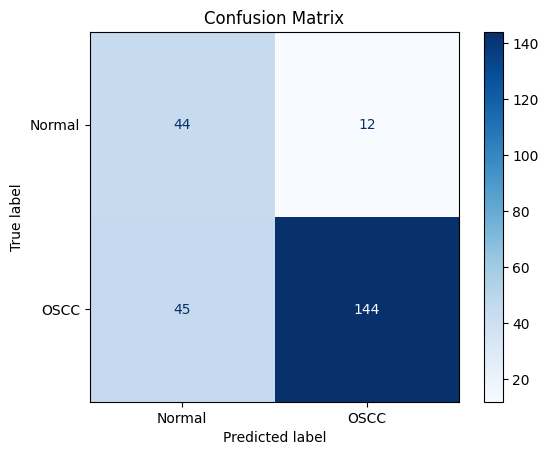

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Get model predictions
y_pred_prob = model.predict(x_test)  # Probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "OSCC"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [31]:
print(cm)

[[ 28  28]
 [ 24 165]]


In [12]:
#history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

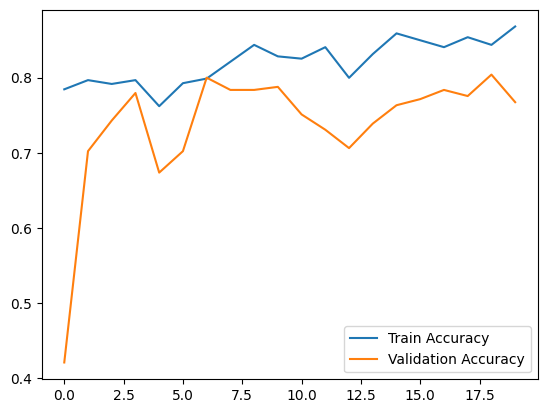

8/8 [==============================] - 2s 200ms/step - loss: 1.0255 - accuracy: 0.7673
Test Accuracy: 76.73%


In [35]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

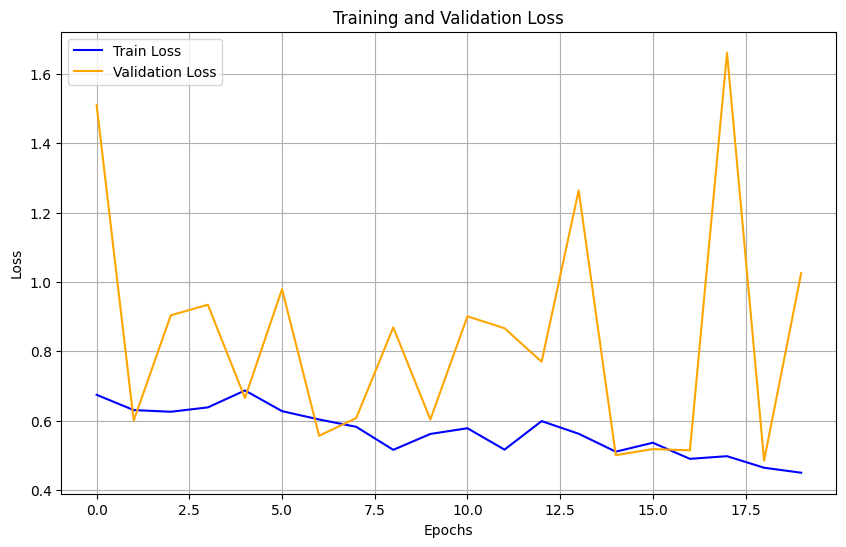

In [36]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
model.save("basicCNN_model.keras")

In [16]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("basicCNN_model.keras")

# Print the model summary to verify
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,507,269 (127.82 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,338,180 (85.21 MB)

In [47]:
def predict_image(image_path, model):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    prediction = model.predict(img_array)
    print(prediction[0])
    if prediction[0] > 0.5:
        print("Prediction: OSCC")
    else:
        print("Prediction: Normal")
        
predict_image(r'Dataset/First Set/Normal/Normal_100x_1.jpg', model)
predict_image(r'Dataset/Second Set/Normal/Normal_400x_1.jpg', model)


# predict_image(r'OSCC_100x_54.jpg', model)
# predict_image(r'OSCC_100x_75.jpg', model)
# predict_image(r'OSCC_100x_98.jpg', model)
# predict_image(r'OSCC_100x_105.jpg', model)
# predict_image(r'OSCC_100x_112.jpg', model)
# predict_image(r'OSCC_100x_169.jpg', model)

predict_image(r'Dataset/First Set/OSCC/OSCC_100x_7.jpg', model)
predict_image(r'Dataset/Second Set/OSCC/OSCC_400x_422.jpg', model)     
        

1/1 [==============================] - 0s 26ms/step
[0.00466544]
Prediction: Normal
1/1 [==============================] - 0s 26ms/step
[0.18051292]
Prediction: Normal
1/1 [==============================] - 0s 24ms/step
[0.8820567]
Prediction: OSCC
1/1 [==============================] - 0s 27ms/step
[0.99748737]
Prediction: OSCC


8/8 [==============================] - 2s 200ms/step


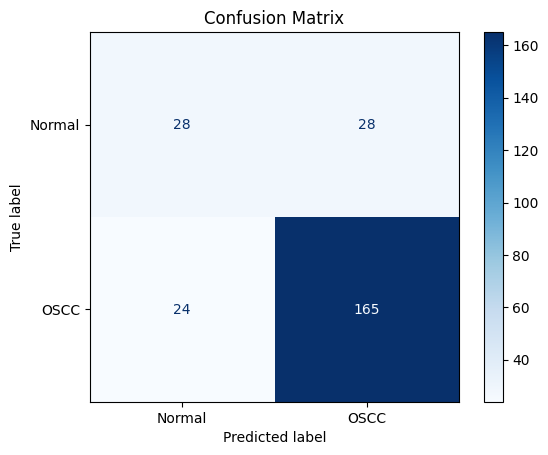

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Get model predictions
y_pred_prob = model.predict(x_test)  # Probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "OSCC"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

